In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("tinder_google_play_reviews.csv")
print(data.head())

                               reviewId         userName  \
0  1c4a952c-31a0-4f7e-99c4-09b197bf0c24   Angelic Monkey   
1  8fdbbd28-4bc2-4a94-a242-550d7af30de1          Renee F   
2  66ae91a0-93a4-402c-9a1c-c4f8032be7ab    Justin Gillis   
3  b0721eaa-b16c-4b06-9022-1c86cb49d341    August Orozco   
4  b536f036-f768-4c86-975d-7de45df0c47c  Michael Hiebert   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AFdZu...   
1  https://play-lh.googleusercontent.com/a-/AFdZu...   
2  https://play-lh.googleusercontent.com/a/AItbvm...   
3  https://play-lh.googleusercontent.com/a/AItbvm...   
4  https://play-lh.googleusercontent.com/a/AItbvm...   

                                             content  score  thumbsUpCount  \
0                           Horrible app doesnt work      1              0   
1  Got banned and didn't do anything wrong AND I ...      1              0   
2  Cannot use the app. Opens to a white screen, a...      1         

In [3]:
data = data[["content"]]


In [4]:
print(data.head())


                                             content
0                           Horrible app doesnt work
1  Got banned and didn't do anything wrong AND I ...
2  Cannot use the app. Opens to a white screen, a...
3                                              Sucks
4     Nobody is real on here. Don't waste your life.


In [5]:
data.isnull().sum()


content    1341
dtype: int64

In [6]:
data = data.dropna() #drop all null values

In [7]:
#data cleansing 
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

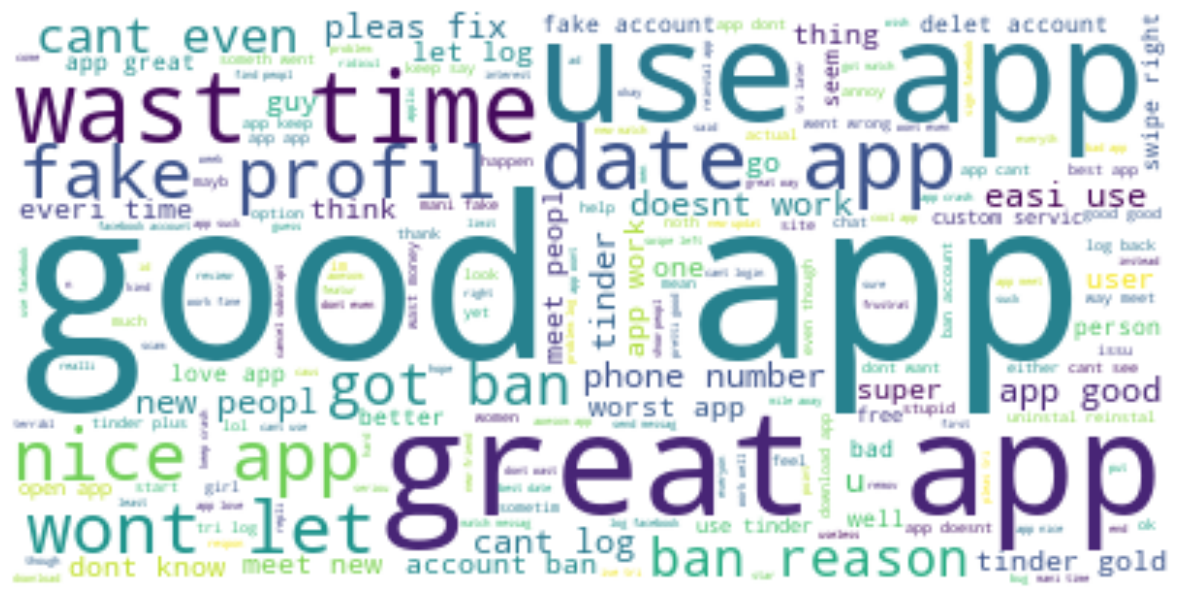

In [8]:
#generic word cloud
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
#sentiment analysis
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                            horribl app doesnt work     0.000     0.000   
1       got ban didnt anyth wrong never got refund 🙃     0.210     0.296   
2  cannot use app open white screen wont progress...     0.105     0.199   
3                                               suck     0.000     1.000   
4                         nobodi real dont wast life     0.000     0.000   

   Neutral  
0    1.000  
1    0.494  
2    0.697  
3    0.000  
4    1.000  


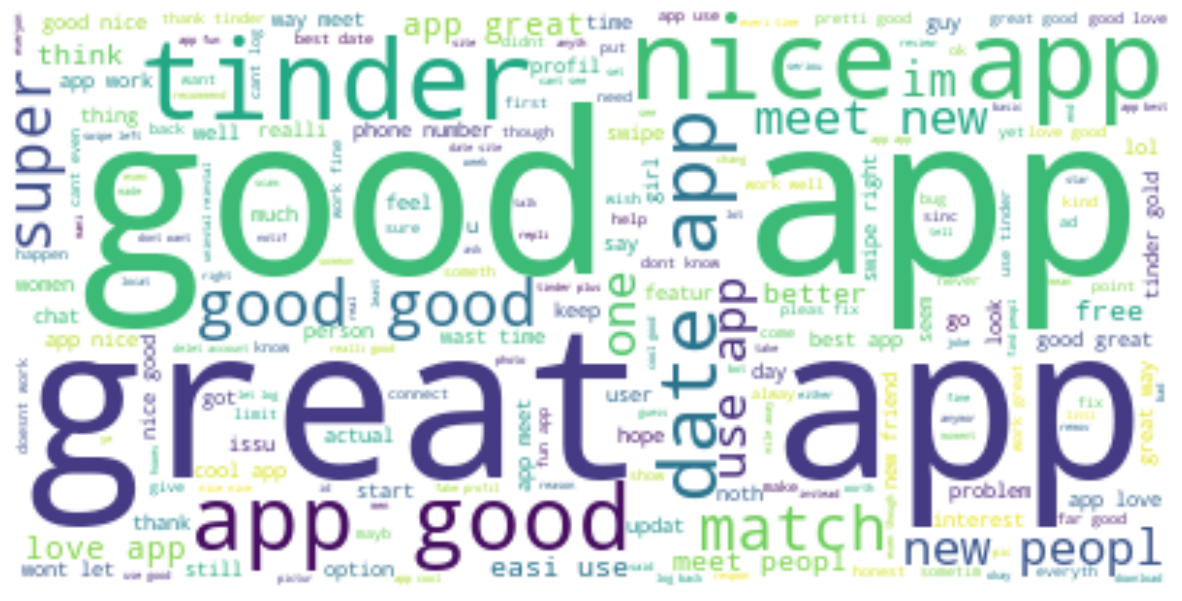

In [10]:
#positive word cloud
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

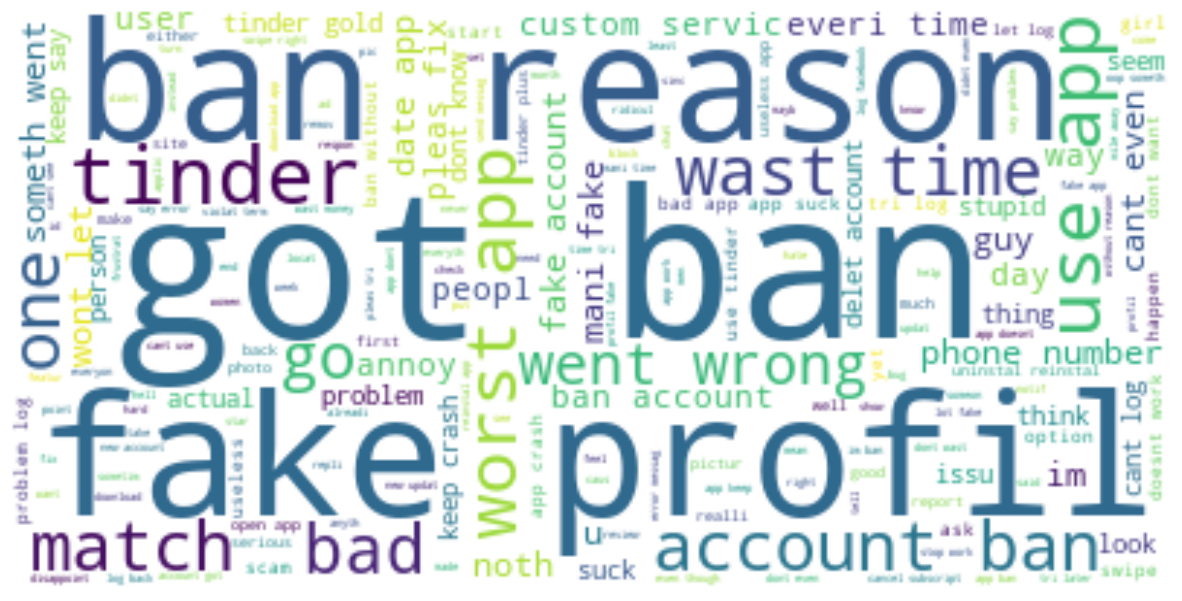

In [11]:
#negative word cloud
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [13]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  160764.7730000266
Negative:  61477.3439999993
Neutral:  321097.8129999684
